<a href="https://colab.research.google.com/github/SONU453/Anomaly-Detection-Wildlife-Monitoring/blob/main/AnomalyDetectionWildlifeMonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('/content/migration_original.csv')
print(data.head())

     event-id  visible                timestamp  location-long  location-lat  \
0  1082620685     True  2009-05-27 14:00:00.000       24.58617      61.24783   
1  1082620686     True  2009-05-27 20:00:00.000       24.58217      61.23267   
2  1082620687     True  2009-05-28 05:00:00.000       24.53133      61.18833   
3  1082620688     True  2009-05-28 08:00:00.000       24.58200      61.23283   
4  1082620689     True  2009-05-28 14:00:00.000       24.58250      61.23267   

   manually-marked-outlier  visible.1 sensor-type  \
0                      NaN       True         gps   
1                      NaN       True         gps   
2                      NaN       True         gps   
3                      NaN       True         gps   
4                      NaN       True         gps   

  individual-taxon-canonical-name  tag-local-identifier  \
0                    Larus fuscus                 91732   
1                    Larus fuscus                 91732   
2                    La

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler

# Convert timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Fill missing values for numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

# Debugging: Check the columns in the dataset
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Identify and drop numerical columns with no observed values
valid_numerical_cols = [
    col for col in numerical_cols if data[col].notna().sum() > 0
]
print(f"Numerical columns with observed values: {valid_numerical_cols}")

# Check the shape of the data before imputation
print("Shape of data before imputation:")
print(data[valid_numerical_cols].shape)

# Impute missing values for numerical columns using median
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(data[valid_numerical_cols])

# Convert back to DataFrame
imputed_data = pd.DataFrame(
    imputed_data,
    columns=valid_numerical_cols,
    index=data.index
)

# Assign imputed data back to the original DataFrame
data[valid_numerical_cols] = imputed_data

# Check the shape after imputation
print("Shape of data after imputation:")
print(data[valid_numerical_cols].shape)

# Impute missing values for categorical columns using the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Feature Engineering: Calculate Speed and Acceleration

# Function to calculate speed between two lat/lon points (in km/h)
def calculate_speed(row, prev_row):
    if prev_row is None:
        return 0
    prev_coords = (prev_row['location-lat'], prev_row['location-long'])
    curr_coords = (row['location-lat'], row['location-long'])
    distance = geodesic(prev_coords, curr_coords).km
    time_diff = (row['timestamp'] - prev_row['timestamp']).seconds / 3600  # hours
    speed = distance / time_diff if time_diff > 0 else 0
    return speed

# Add 'speed' and 'acceleration' columns
data['speed'] = data.apply(lambda row: calculate_speed(row, data.iloc[row.name - 1] if row.name > 0 else None), axis=1)
data['acceleration'] = data['speed'].diff().fillna(0)

# Drop rows with missing speed or acceleration
data = data.dropna(subset=['speed', 'acceleration'])

# Normalize the 'speed' and 'acceleration' columns
scaler = StandardScaler()
data[['speed', 'acceleration']] = scaler.fit_transform(data[['speed', 'acceleration']])

# Display the preprocessed data
print(data.head())


Numerical columns: Index(['event-id', 'location-long', 'location-lat', 'manually-marked-outlier',
       'tag-local-identifier',
       'ECMWF Interim Full Daily Invariant Low Vegetation Cover',
       'NCEP NARR SFC Vegetation at Surface',
       'ECMWF Interim Full Daily Invariant High Vegetation Cover'],
      dtype='object')
Categorical columns: Index(['sensor-type', 'individual-taxon-canonical-name',
       'individual-local-identifier', 'study-name'],
      dtype='object')
Numerical columns with observed values: ['event-id', 'location-long', 'location-lat', 'tag-local-identifier', 'ECMWF Interim Full Daily Invariant Low Vegetation Cover', 'ECMWF Interim Full Daily Invariant High Vegetation Cover']
Shape of data before imputation:
(89867, 6)
Shape of data after imputation:
(89867, 6)
       event-id  visible           timestamp  location-long  location-lat  \
0  1.082621e+09     True 2009-05-27 14:00:00       24.58617      61.24783   
1  1.082621e+09     True 2009-05-27 20:00:00  

In [ ]:
# Select features for anomaly detection (Speed and Acceleration)
features = data[['speed', 'acceleration']]

# Display the selected features
print(features.head())


      speed  acceleration
0 -0.083564 -1.995306e-08
1 -0.076719  5.437389e-03
2 -0.068433  6.581418e-03
3 -0.038082  2.410920e-02
4 -0.083434 -3.602517e-02


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler

# Convert timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Fill missing values for numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

# Debugging: Check the columns in the dataset
print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Identify and drop numerical columns with no observed values
valid_numerical_cols = [
    col for col in numerical_cols if data[col].notna().sum() > 0
]
print(f"Numerical columns with observed values: {valid_numerical_cols}")

# Check the shape of the data before imputation
print("Shape of data before imputation:")
print(data[valid_numerical_cols].shape)

# Impute missing values for numerical columns using median
imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(data[valid_numerical_cols])

# Convert back to DataFrame
imputed_data = pd.DataFrame(
    imputed_data,
    columns=valid_numerical_cols,
    index=data.index
)

# Assign imputed data back to the original DataFrame
data[valid_numerical_cols] = imputed_data

# Check the shape after imputation
print("Shape of data after imputation:")
print(data[valid_numerical_cols].shape)

# Impute missing values for categorical columns using the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Feature Engineering: Calculate Speed and Acceleration

# Function to calculate speed between two lat/lon points (in km/h)
def calculate_speed(row, prev_row):
    if prev_row is None:
        return 0
    prev_coords = (prev_row['location-lat'], prev_row['location-long'])
    curr_coords = (row['location-lat'], row['location-long'])
    distance = geodesic(prev_coords, curr_coords).km
    time_diff = (row['timestamp'] - prev_row['timestamp']).seconds / 3600  # hours
    speed = distance / time_diff if time_diff > 0 else 0
    return speed

# Add 'speed' and 'acceleration' columns
data['speed'] = data.apply(lambda row: calculate_speed(row, data.iloc[row.name - 1] if row.name > 0 else None), axis=1)
data['acceleration'] = data['speed'].diff().fillna(0)

# Instead of dropping rows, replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing or infinite values in 'speed' and 'acceleration'
imputer_num = SimpleImputer(strategy='median')  # Or use another strategy
data[['speed', 'acceleration']] = imputer_num.fit_transform(data[['speed', 'acceleration']])

Numerical columns: Index(['event-id', 'location-long', 'location-lat', 'manually-marked-outlier',
       'tag-local-identifier',
       'ECMWF Interim Full Daily Invariant Low Vegetation Cover',
       'NCEP NARR SFC Vegetation at Surface',
       'ECMWF Interim Full Daily Invariant High Vegetation Cover'],
      dtype='object')
Categorical columns: Index(['sensor-type', 'individual-taxon-canonical-name',
       'individual-local-identifier', 'study-name'],
      dtype='object')
Numerical columns with observed values: ['event-id', 'location-long', 'location-lat', 'tag-local-identifier', 'ECMWF Interim Full Daily Invariant Low Vegetation Cover', 'ECMWF Interim Full Daily Invariant High Vegetation Cover']
Shape of data before imputation:
(89867, 6)
Shape of data after imputation:
(89867, 6)


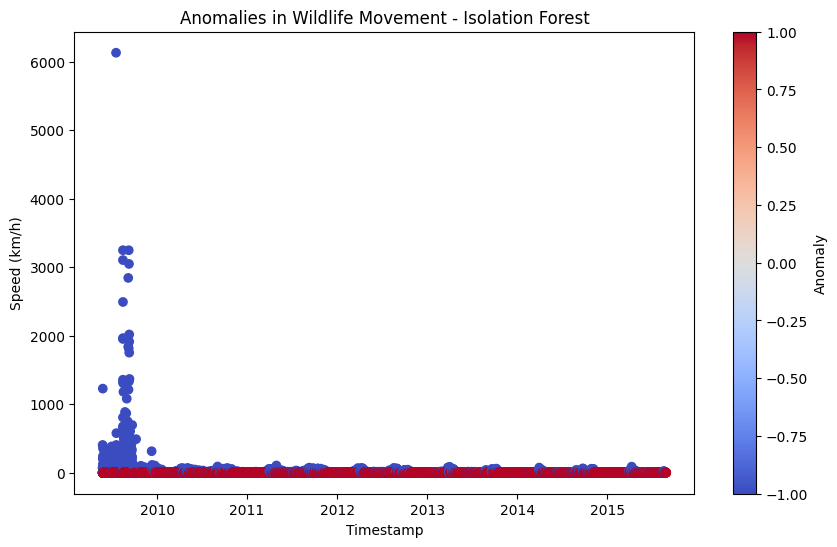

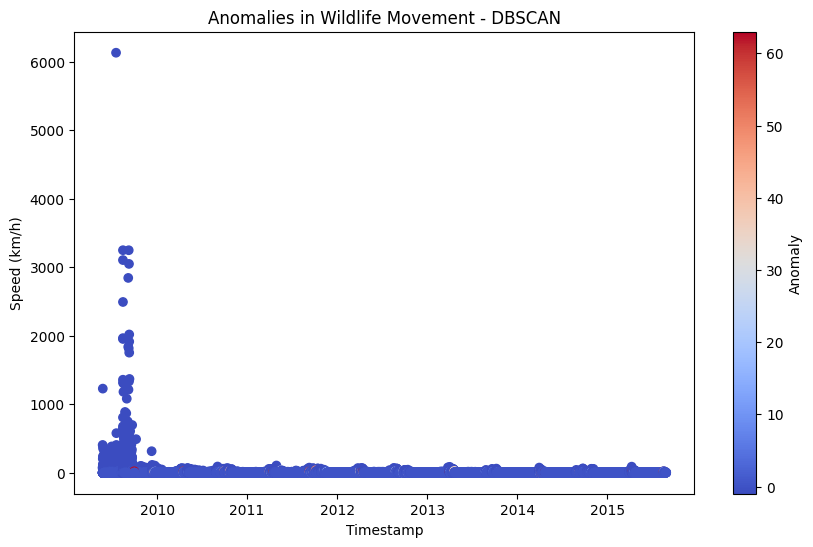

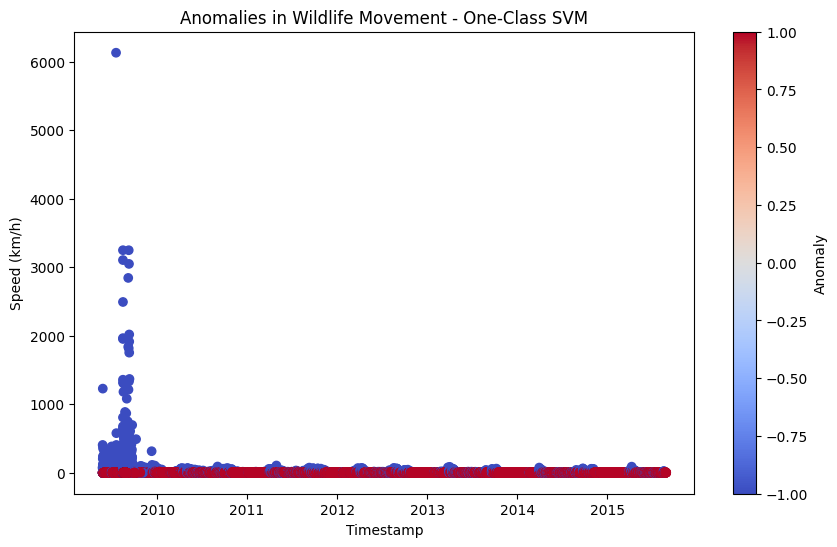

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

# Model 1: Isolation Forest
iso_forest = IsolationForest(random_state=42)
features = data[['speed', 'acceleration']]
iso_forest.fit(features)
data['anomaly_iso_forest'] = iso_forest.predict(features)  # Assign results to data DataFrame

# Model 2: DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['anomaly_dbscan'] = dbscan.fit_predict(features)      # Assign results to data DataFrame

# Model 3: One-Class SVM
ocsvm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
ocsvm.fit(features)
data['anomaly_ocsvm'] = ocsvm.predict(features)           # Assign results to data DataFrame


# Plotting Function (Unchanged)

def plot_anomalies(model_name, anomalies):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['timestamp'], data['speed'], c=anomalies, cmap='coolwarm', marker='o')
    plt.title(f"Anomalies in Wildlife Movement - {model_name}")
    plt.xlabel('Timestamp')
    plt.ylabel('Speed (km/h)')
    plt.colorbar(label='Anomaly')
    plt.show()


# Plotting Anomalies (Unchanged)

plot_anomalies("Isolation Forest", data['anomaly_iso_forest'])
plot_anomalies("DBSCAN", data['anomaly_dbscan'])
plot_anomalies("One-Class SVM", data['anomaly_ocsvm'])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score # Import silhouette_score

# Calculate Silhouette Scores for each model
# Assuming 'features' is the DataFrame containing the features used for anomaly detection
score_iso_forest = silhouette_score(features, data['anomaly_iso_forest'])
score_dbscan = silhouette_score(features, data['anomaly_dbscan'])
score_ocsvm = silhouette_score(features, data['anomaly_ocsvm'])

# Suggest the best model based on evaluation scores
best_model = "Isolation Forest" if score_iso_forest > max(score_dbscan, score_ocsvm) else \
    "DBSCAN" if score_dbscan > score_ocsvm else "One-Class SVM"
print(f"The best model based on Silhouette Score is: {best_model}")

The best model based on Silhouette Score is: Isolation Forest
